# Experimentación de dos variables

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo resultados
Primero, leemos el archivo de resultados de ejecución de bt. Para esto, vamos a abrirlo con Pandas y guardarlo en un DataFrame (df).

In [14]:
df = pd.read_csv("tp2l/complejidades_treePR.csv")
df['t'] = df['tiempo']
print(df)

    fila  columna      tiempo           t
0      2        2    0.042111    0.042111
1      2       52    0.370930    0.370930
2      2      102    0.731677    0.731677
3      2      152    0.949714    0.949714
4      2      202    1.106680    1.106680
5      2      302    1.719480    1.719480
6      2      402    2.104090    2.104090
7      2      502    2.881540    2.881540
8     52        2    0.181419    0.181419
9     52       52    6.576480    6.576480
10    52      102   12.631300   12.631300
11    52      152   16.700300   16.700300
12    52      202   25.011400   25.011400
13    52      302   33.263900   33.263900
14    52      402   49.686500   49.686500
15    52      502   58.123700   58.123700
16   102        2    0.346253    0.346253
17   102       52   12.664000   12.664000
18   102      102   24.641900   24.641900
19   102      152   33.500900   33.500900
20   102      202   49.278100   49.278100
21   102      302   65.322900   65.322900
22   102      402   97.568000   97

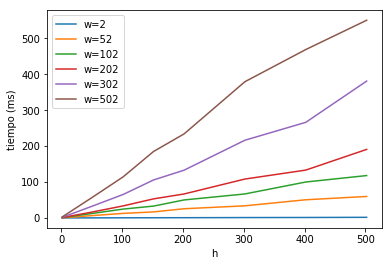

In [16]:
# Graficamos el tiempo en función de n, con series variando m.
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 2]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 52]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 102]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 152]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 302]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 502]);
ax1.legend(["w=2", "w=52", "w=102", "w=202" , "w=302" , "w=502" , ]);
plt.ylabel("tiempo (ms)");
plt.xlabel("h");

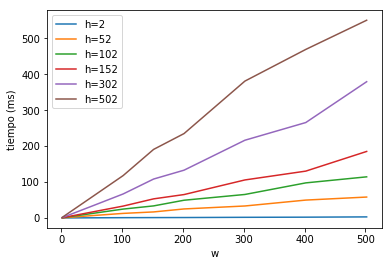

In [17]:
# Graficamos el tiempo en función de m, con series variando n.
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 2]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 52]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 102]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 152]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 302]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 502]);
ax1.legend(["h=2", "h=52", "h=102" , "h=152", "h=302", "h=502"]);
plt.ylabel("tiempo (ms)");
plt.xlabel("w");

Al igual que en $meet$-$in$-$the$-$middle$, y como mencionamos en el gráfico anterior, notamos un comportamiento errático para un mismo $n$ con distintos $W$. Esto refuerza nuestra hipótesis del párrafo anterior, por lo que utilizaremos la experimentación descrita para corroborarla o refutarla.

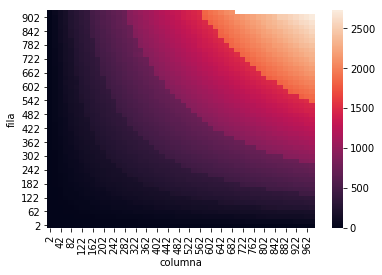

In [20]:
heat_df = df.pivot("fila", "columna", "t");
ax = sns.heatmap(heat_df)
ax.invert_yaxis()

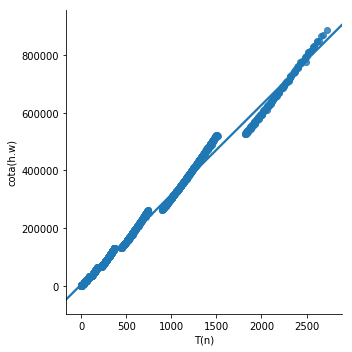

In [21]:
df["cota"] =((df["fila"]) * (df["columna"]));
# Grafico correlación.
ax1 = sns.lmplot(x='tiempo', y='cota', data=df);
plt.xlabel("T(n)");
plt.ylabel("cota(h.w)");

In [22]:
df2 = df.loc[df['columna'] <= 102]
r = np.corrcoef(df2["t"], df2["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))

El coeficiente de correlación de Pearson es: r=0.9969830670899498
